In [ ]:
pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.5.2
Uninstalling scikit-learn-1.5.2:
  Successfully uninstalled scikit-learn-1.5.2


In [ ]:
!pip install scikit-learn~=1.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 109.5 MB/s eta 0:00:00


In [ ]:
#you need restart the session after you install it
!pip install matminer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.5/68.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 35.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.2/722.2 kB 59.8 MB/s eta 0:

In [ ]:
pip install torch_geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [ ]:
!pip install shap

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data
from pymatgen.analysis.graphs import MoleculeGraph
from pymatgen.core import Element
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/file/path/final_electronic_enthalpy_entropy_vibration_dataset.csv')

# List of target columns (these will be excluded from input features)
target_columns = ['electronic_energy_Ha', 'total_enthalpy_kcal_mol', 'total_entropy_cal_molK', 'free_energy_eV', 'vibration_frequencies_avg']

# Extract all feature columns (those that are not target columns or 'molecule_graph')
feature_columns = [col for col in df.columns if col not in target_columns and col != 'molecule_graph']

# Extract input features (x) from the dataset without normalizing them
x = df[feature_columns].values

# Normalize the target values (y)
y = df[target_columns].values
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y)

# 'x' now contains the input features for the model, and 'y_normalized' contains the normalized target values.


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('/file/path/final_electronic_enthalpy_entropy_vibration_dataset.csv')

# List of target columns (these will be excluded from input features)
target_columns = ['electronic_energy_Ha', 'total_enthalpy_kcal_mol', 'total_entropy_cal_molK', 'free_energy_eV', 'vibration_frequencies_avg']

# Extract all feature columns (those that are not target columns or 'molecule_graph')
feature_columns = [col for col in df.columns if col not in target_columns and col != 'molecule_graph']

# Filter only numeric columns (additional numeric features)
numeric_feature_columns = ['charge', 'number_atoms', 'number_elements', 'spin_multiplicity']

# Normalize the target values (y)
y = df[target_columns].values
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y)

# Show the column names of the numeric features
print("Numeric Feature Columns:")
print(numeric_feature_columns)

# The result is ready with target values normalized and numeric features selected


In [ ]:
import pandas as pd
import torch
from torch_geometric.data import Data
from pymatgen.analysis.graphs import MoleculeGraph
from pymatgen.core import Element
from sklearn.preprocessing import StandardScaler
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import random


# Function to set the random seed for reproducibility
def set_seed(seed):
    # Set random seed for Python
    random.seed(seed)

    # Set random seed for NumPy
    np.random.seed(seed)

    # Set random seed for PyTorch
    torch.manual_seed(seed)

# Call the set_seed function before training to ensure reproducibility
set_seed(42)

# Function to safely parse the 'molecule_graph' column
def parse_molecule_graph(molecule_graph_str):
    if pd.isnull(molecule_graph_str):
        return None
    try:
        molecule_graph_dict = eval(molecule_graph_str)  # Convert string representation to dictionary
        molecule_graph = MoleculeGraph.from_dict(molecule_graph_dict)
        return molecule_graph
    except Exception as e:
        print(f"Error parsing molecule graph: {e}")
        return None

# Load the dataset
df = pd.read_csv('/file/path/final_electronic_enthalpy_entropy_vibration_dataset.csv')

# List of target columns (these will be excluded from input features)
target_columns = ['electronic_energy_Ha', 'total_enthalpy_kcal_mol', 'total_entropy_cal_molK', 'free_energy_eV', 'vibration_frequencies_avg']

# Convert the 'free_energy_eV' column in the target columns from eV to keV
df['free_energy_keV'] = df['free_energy_eV'] * 0.001

# Update the target_columns to reflect the new unit for free energy
target_columns = ['electronic_energy_Ha', 'total_enthalpy_kcal_mol', 'total_entropy_cal_molK', 'free_energy_keV', 'vibration_frequencies_avg']

# Extract all feature columns (those that are not target columns or 'molecule_graph')
feature_columns = [col for col in df.columns if col not in target_columns and col != 'molecule_graph']

# Filter only numeric columns (additional numeric features)
numeric_feature_columns = ['charge', 'number_atoms', 'number_elements', 'spin_multiplicity']

# Normalize the target values (y) with free energy in keV
y = df[target_columns].values
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y)

# Parse the 'molecule_graph' column into MoleculeGraph objects
df['molecule_graph'] = df['molecule_graph'].apply(parse_molecule_graph)

# Ensure that 'molecule_graph' is properly parsed and drop any rows where parsing failed
df = df.dropna(subset=['molecule_graph'])

# Function to convert the MoleculeGraph and 'bonds' into PyTorch Geometric Data
def molgraph_to_pyg(row):
    try:
        # Extract atom features (atomic number Z + additional numeric features)
        atom_features = []
        bonds = eval(row['bonds'])  # Parse bonds information (edges)
        for site in row['molecule_graph'].molecule:
            element = Element(site.specie.symbol)
            node_features = [element.Z]  # Start with atomic number as node feature

            # Add the numeric features for each atom
            node_features.extend(row[numeric_feature_columns].values)

            atom_features.append(node_features)

        # Use 'bonds' column for edge indices (bond information)
        edge_index = []
        for bond in bonds:
            edge_index.append([bond[0], bond[1]])
            edge_index.append([bond[1], bond[0]])  # For undirected graph

        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        x = torch.tensor(atom_features, dtype=torch.float)

        return Data(x=x, edge_index=edge_index)

    except Exception as e:
        print(f"Error converting MoleculeGraph to PyTorch Geometric Data: {e}")
        return None

# Apply the molgraph_to_pyg conversion using 'molecule_graph' and 'bonds'
df['pyg_graph'] = df.apply(lambda row: molgraph_to_pyg(row), axis=1)

# Drop rows with invalid graphs
df = df.dropna(subset=['pyg_graph'])

# Extract the PyG Data objects for training
graph_data = df['pyg_graph'].tolist()

# Split the dataset into training and test sets
train_graphs, test_graphs, train_targets, test_targets = train_test_split(graph_data, y_normalized, test_size=0.2, random_state=42)

# Custom Dataset class for PyTorch Geometric
class MoleculeDataset(torch.utils.data.Dataset):
    def __init__(self, graphs, targets):
        self.graphs = graphs
        self.targets = targets

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], torch.tensor(self.targets[idx], dtype=torch.float)

# Prepare datasets and dataloaders
train_dataset = MoleculeDataset(train_graphs, train_targets)
test_dataset = MoleculeDataset(test_graphs, test_targets)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# GNN model definition with an additional GCN layer
class GNNModel(torch.nn.Module):
    def __init__(self, hidden_channels, num_node_features):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)  # New GCN Layer
        self.fc1 = torch.nn.Linear(hidden_channels, 64)
        self.fc2 = torch.nn.Linear(64, len(target_columns))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)  # Pass through the new GCN layer
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model with the number of node features (atomic number + 4 additional numeric features)
model = GNNModel(hidden_channels=64, num_node_features=len(numeric_feature_columns) + 1)  # +1 for atomic number

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training function
def train():
    model.train()
    total_loss = 0
    for data, targets in train_loader:
        optimizer.zero_grad()
        out = model(data)
        loss = F.mse_loss(out, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(train_loader)

# Testing function
def test():
    model.eval()
    total_loss = 0
    actuals = []
    predictions = []
    with torch.no_grad():
        for data, targets in test_loader:
            out = model(data)
            loss = F.mse_loss(out, targets)
            total_loss += loss.item()
            predictions.append(out.cpu().numpy())
            actuals.append(targets.cpu().numpy())

    predictions = np.concatenate(predictions, axis=0)
    actuals = np.concatenate(actuals, axis=0)

    return total_loss / len(test_loader), predictions, actuals

# Training loop
train_losses = []
test_losses = []

for epoch in range(300):  # Run for 200 epochs
    train_loss = train()
    test_loss, predictions, actuals = test()

    train_losses.append(train_loss)
    test_losses.append(test_loss)

    print(f'Epoch {epoch + 1}, Train Loss: {train_loss}, Test Loss: {test_loss}')

# Save the trained model
torch.save(model.state_dict(), '/file/path/proj_1_Li_battery/gnn_model_300.pth')

# Convert predictions and actuals back to their original scale
predictions_original = scaler_y.inverse_transform(predictions)
actuals_original = scaler_y.inverse_transform(actuals)

# Evaluate metrics for each target
for i, target_name in enumerate(target_columns):
    r2 = r2_score(actuals_original[:, i], predictions_original[:, i])
    mae = mean_absolute_error(actuals_original[:, i], predictions_original[:, i])
    rmse = np.sqrt(mean_squared_error(actuals_original[:, i], predictions_original[:, i]))
    pearson = pearsonr(actuals_original[:, i], predictions_original[:, i])[0]

    print(f'\nMetrics for {target_name} (original scale):')
    print(f'R-squared: {r2}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Pearson Correlation: {pearson}')

# Plot Actual vs Predicted for each target with updated titles for publication
plt.figure(figsize=(14, 12))

# Dictionary to provide descriptive plot titles
plot_titles = {
    'electronic_energy_Ha': 'Electronic Energy (Ha)',
    'total_enthalpy_kcal_mol': 'Total Enthalpy (kcal/mol)',
    'total_entropy_cal_molK': 'Total Entropy (cal/mol·K)',
    'free_energy_keV': 'Free Energy (keV)',
    'vibration_frequencies_avg': 'Average Vibration Frequencies (cm$^{-1}$)'
}

for i, target_name in enumerate(target_columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(actuals_original[:, i], predictions_original[:, i], alpha=0.6)
    plt.plot([actuals_original[:, i].min(), actuals_original[:, i].max()],
             [actuals_original[:, i].min(), actuals_original[:, i].max()], 'k--', lw=3)
    plt.xlabel(f'Actual {plot_titles[target_name]}')
    plt.ylabel(f'Predicted {plot_titles[target_name]}')
    plt.title(f'{plot_titles[target_name]}')

# Global title
plt.suptitle('GNN Model Predictions for LIB Properties on Test Set Dataset', fontsize=18)

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
plt.savefig('/file/path/proj_1_Li_battery/actual_vs_predicted_plots_gnn_300.png', dpi=300)
plt.show()

# Plot the learning curve (Train and Test Loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for GNN Model on LIB Electrolyte Properties', fontsize=16)
plt.legend()

# Save the learning curve figure
plt.savefig('/file/path/proj_1_Li_battery/learning_curve_gnn_300.png', dpi=300)
plt.show()


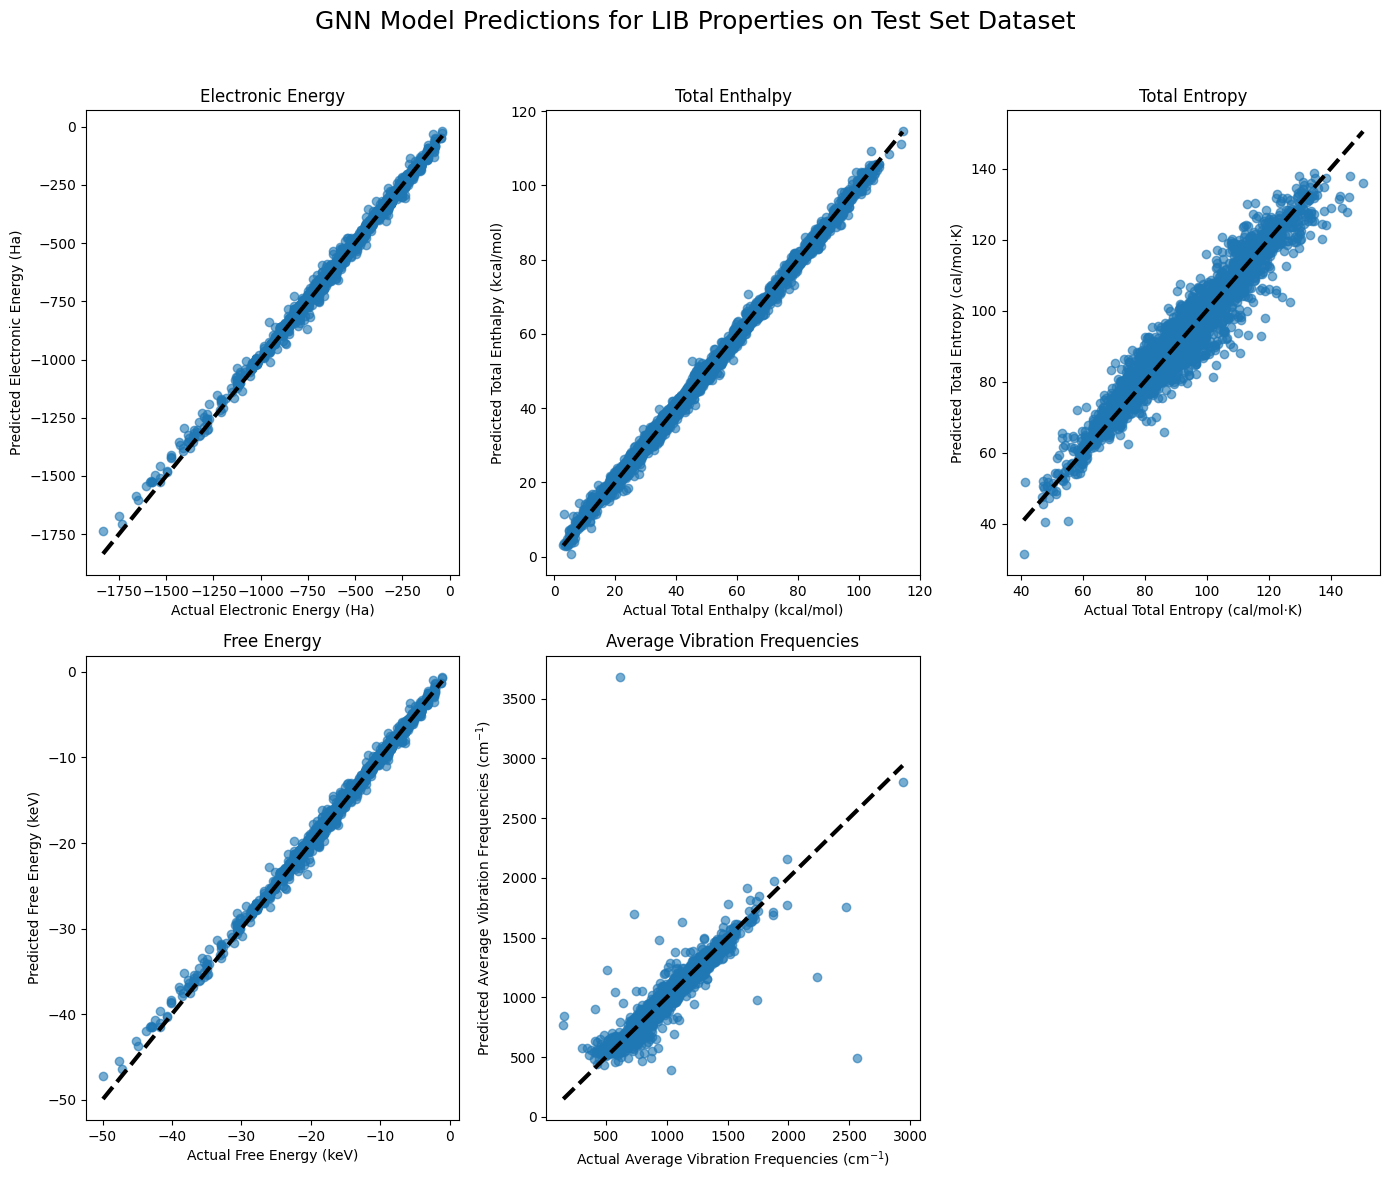

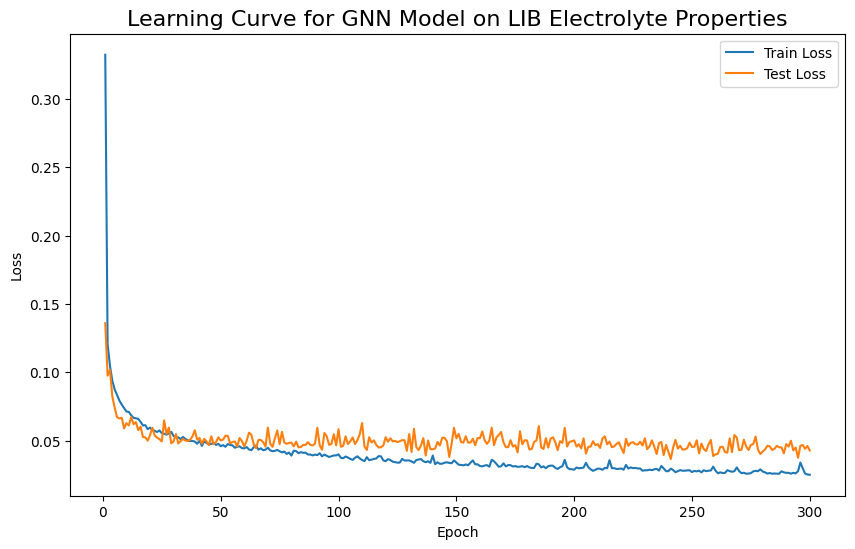

In [ ]:
plt.figure(figsize=(14, 12))

# Dictionary to provide plot titles (without units) and axis labels (with units)
plot_titles_no_units = {
    'electronic_energy_Ha': 'Electronic Energy',
    'total_enthalpy_kcal_mol': 'Total Enthalpy',
    'total_entropy_cal_molK': 'Total Entropy',
    'free_energy_keV': 'Free Energy',
    'vibration_frequencies_avg': 'Average Vibration Frequencies'
}

axis_labels_with_units = {
    'electronic_energy_Ha': 'Electronic Energy (Ha)',
    'total_enthalpy_kcal_mol': 'Total Enthalpy (kcal/mol)',
    'total_entropy_cal_molK': 'Total Entropy (cal/mol·K)',
    'free_energy_keV': 'Free Energy (keV)',
    'vibration_frequencies_avg': 'Average Vibration Frequencies (cm$^{-1}$)'
}

for i, target_name in enumerate(target_columns):
    plt.subplot(2, 3, i + 1)
    plt.scatter(actuals_original[:, i], predictions_original[:, i], alpha=0.6)
    plt.plot([actuals_original[:, i].min(), actuals_original[:, i].max()],
             [actuals_original[:, i].min(), actuals_original[:, i].max()], 'k--', lw=3)
    plt.xlabel(f'Actual {axis_labels_with_units[target_name]}')
    plt.ylabel(f'Predicted {axis_labels_with_units[target_name]}')
    plt.title(f'{plot_titles_no_units[target_name]}')

# Global title
plt.suptitle('GNN Model Predictions for LIB Properties on Test Set Dataset', fontsize=18)

# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the figure
plt.savefig('/file/path/proj_1_Li_battery/actual_vs_predicted_plots_gnn_300.png', dpi=300)
plt.show()

# Plot the learning curve (Train and Test Loss over epochs)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Learning Curve for GNN Model on LIB Electrolyte Properties', fontsize=16)
plt.legend()

# Save the learning curve figure
plt.savefig('/file/path/proj_1_Li_battery/learning_curve_gnn_300.png', dpi=300)
plt.show()


In [ ]:
import pandas as pd
import torch
import torch.nn.functional as F
from torch_geometric.data import Data
from pymatgen.analysis.graphs import MoleculeGraph
from pymatgen.core import Element
from sklearn.preprocessing import StandardScaler
from torch_geometric.loader import DataLoader
from torch_geometric.nn import GCNConv, global_mean_pool
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random


# Function to set the random seed for reproducibility
def set_seed(seed):
    # Set random seed for Python
    random.seed(seed)

    # Set random seed for NumPy
    np.random.seed(seed)

    # Set random seed for PyTorch
    torch.manual_seed(seed)

# Call the set_seed function before training to ensure reproducibility
set_seed(42)

# Function to safely parse the 'molecule_graph' column
def parse_molecule_graph(molecule_graph_str):
    if pd.isnull(molecule_graph_str):
        return None
    try:
        molecule_graph_dict = eval(molecule_graph_str)  # Convert string representation to dictionary
        molecule_graph = MoleculeGraph.from_dict(molecule_graph_dict)
        return molecule_graph
    except Exception as e:
        print(f"Error parsing molecule graph: {e}")
        return None

# Load the dataset
df = pd.read_csv('/file/path/final_electronic_enthalpy_entropy_vibration_dataset.csv')

# List of target columns
target_columns = ['electronic_energy_Ha', 'total_enthalpy_kcal_mol', 'total_entropy_cal_molK', 'free_energy_eV', 'vibration_frequencies_avg']

# Extract numeric feature columns
numeric_feature_columns = ['charge', 'number_atoms', 'number_elements', 'spin_multiplicity']

# Normalize the target values (y)
y = df[target_columns].values
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y)

# Parse the 'molecule_graph' column into MoleculeGraph objects
df['molecule_graph'] = df['molecule_graph'].apply(parse_molecule_graph)

# Drop rows where parsing failed
df = df.dropna(subset=['molecule_graph'])

# Convert MoleculeGraph to PyTorch Geometric Data
def molgraph_to_pyg(row):
    try:
        atom_features = []
        bonds = eval(row['bonds'])  # Parse bonds information (edges)
        for site in row['molecule_graph'].molecule:
            element = Element(site.specie.symbol)
            node_features = [element.Z]  # Atomic number
            node_features.extend(row[numeric_feature_columns].values)  # Add numeric features for each atom
            atom_features.append(node_features)

        edge_index = []
        for bond in bonds:
            edge_index.append([bond[0], bond[1]])
            edge_index.append([bond[1], bond[0]])  # Undirected graph

        edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
        x = torch.tensor(atom_features, dtype=torch.float)

        return Data(x=x, edge_index=edge_index)
    except Exception as e:
        print(f"Error converting MoleculeGraph to PyG Data: {e}")
        return None

# Apply the molgraph_to_pyg conversion
df['pyg_graph'] = df.apply(lambda row: molgraph_to_pyg(row), axis=1)
df = df.dropna(subset=['pyg_graph'])

# Extract the PyG Data objects for training
graph_data = df['pyg_graph'].tolist()

# Split the dataset into training and test sets
train_graphs, test_graphs, train_targets, test_targets = train_test_split(graph_data, y_normalized, test_size=0.2, random_state=42)

# Custom Dataset class for PyTorch Geometric
class MoleculeDataset(torch.utils.data.Dataset):
    def __init__(self, graphs, targets):
        self.graphs = graphs
        self.targets = targets

    def __len__(self):
        return len(self.graphs)

    def __getitem__(self, idx):
        return self.graphs[idx], torch.tensor(self.targets[idx], dtype=torch.float)

# Prepare datasets and dataloaders
train_dataset = MoleculeDataset(train_graphs, train_targets)
test_dataset = MoleculeDataset(test_graphs, test_targets)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# GNN model definition matching the saved model
class GNNModel(torch.nn.Module):
    def __init__(self, hidden_channels, num_node_features):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)  # Third GCN Layer
        self.fc1 = torch.nn.Linear(hidden_channels, 64)
        self.fc2 = torch.nn.Linear(64, len(target_columns))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)  # Pass through the third GCN layer
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the pretrained model
model = GNNModel(hidden_channels=64, num_node_features=len(numeric_feature_columns) + 1)  # +1 for atomic number
model.load_state_dict(torch.load('/file/path/proj_1_Li_battery/gnn_model_300.pth', weights_only=True))
model.eval()  # Set the model to evaluation mode

# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Active learning loop
def active_learning_loop(model, train_graphs, train_targets, test_graphs, test_targets, n_steps=300):
    train_losses, test_losses = [], []

    for step in range(n_steps):
        train_loader = DataLoader(MoleculeDataset(train_graphs, train_targets), batch_size=32, shuffle=True)
        test_loader = DataLoader(MoleculeDataset(test_graphs, test_targets), batch_size=32, shuffle=False)

        # Training
        model.train()
        total_train_loss = 0
        for data, targets in train_loader:
            optimizer.zero_grad()
            out = model(data)
            loss = F.mse_loss(out, targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        train_losses.append(total_train_loss / len(train_loader))

        # Testing
        model.eval()
        total_test_loss = 0
        actuals, predictions = [], []
        with torch.no_grad():
            for data, targets in test_loader:
                out = model(data)
                loss = F.mse_loss(out, targets)
                total_test_loss += loss.item()
                predictions.append(out.cpu().numpy())
                actuals.append(targets.cpu().numpy())

        predictions = np.concatenate(predictions, axis=0)
        actuals = np.concatenate(actuals, axis=0)
        test_losses.append(total_test_loss / len(test_loader))

        print(f'Step {step + 1}, Train Loss: {train_losses[-1]}, Test Loss: {test_losses[-1]}')

        # Active learning strategy: Predictions and uncertainties
        uncertainties = np.abs(predictions - actuals)

        # Maximum Expected Improvement (MEI)
        mei_selection = np.argmax(predictions[:, 0])  # Assuming focus on first target

        # Maximum Likelihood of Improvement (MLI)
        max_in_train = np.max(train_targets[:, 0])
        mli_selection = np.argmax((predictions[:, 0] - max_in_train) / (uncertainties[:, 0] + 1e-9))

        # Maximum Uncertainty (MU)
        mu_selection = np.argmax(uncertainties[:, 0])

        # Add selected points to the training set
        selections = [mei_selection, mli_selection, mu_selection]
        for selection in selections:
            if selection < len(test_graphs):
                train_graphs.append(test_graphs[selection])
                train_targets = np.vstack((train_targets, test_targets[selection]))
                test_graphs.pop(selection)
                test_targets = np.delete(test_targets, selection, axis=0)

    return train_losses, test_losses, predictions, actuals

# Run the active learning loop
train_losses, test_losses, predictions, actuals = active_learning_loop(model, train_graphs, train_targets, test_graphs, test_targets, n_steps=200)

# Convert predictions and actuals back to original scale
predictions_original = scaler_y.inverse_transform(predictions)
actuals_original = scaler_y.inverse_transform(actuals)

# Convert 'free_energy_eV' predictions to keV for display purposes
predictions_original[:, 3] = predictions_original[:, 3] * 0.001  # Convert eV to keV
actuals_original[:, 3] = actuals_original[:, 3] * 0.001  # Convert eV to keV

# Dictionary to provide descriptive plot titles
plot_titles = {
    'electronic_energy_Ha': 'Electronic Energy (Ha)',
    'total_enthalpy_kcal_mol': 'Total Enthalpy (kcal/mol)',
    'total_entropy_cal_molK': 'Total Entropy (cal/mol·K)',
    'free_energy_keV': 'Free Energy (keV)',  # Already converted in plotting
    'vibration_frequencies_avg': 'Vibration Frequencies (avg)'
}



# Save the final trained model after active learning
torch.save(model.state_dict(), '/file/path/gnn_model_after_active_learning_200_new.pth')

# Evaluate metrics for each target and print results
for i, target_name in enumerate(target_columns):
    if target_name == 'free_energy_eV':  # Convert to keV for display
        target_name = 'free_energy_keV'

    r2 = r2_score(actuals_original[:, i], predictions_original[:, i])
    mae = mean_absolute_error(actuals_original[:, i], predictions_original[:, i])
    rmse = np.sqrt(mean_squared_error(actuals_original[:, i], predictions_original[:, i]))
    pearson = pearsonr(actuals_original[:, i], predictions_original[:, i])[0]

    print(f'\nMetrics for {target_name} (original scale):')
    print(f'R-squared: {r2}')
    print(f'Mean Absolute Error: {mae}')
    print(f'Root Mean Squared Error: {rmse}')
    print(f'Pearson Correlation: {pearson}')


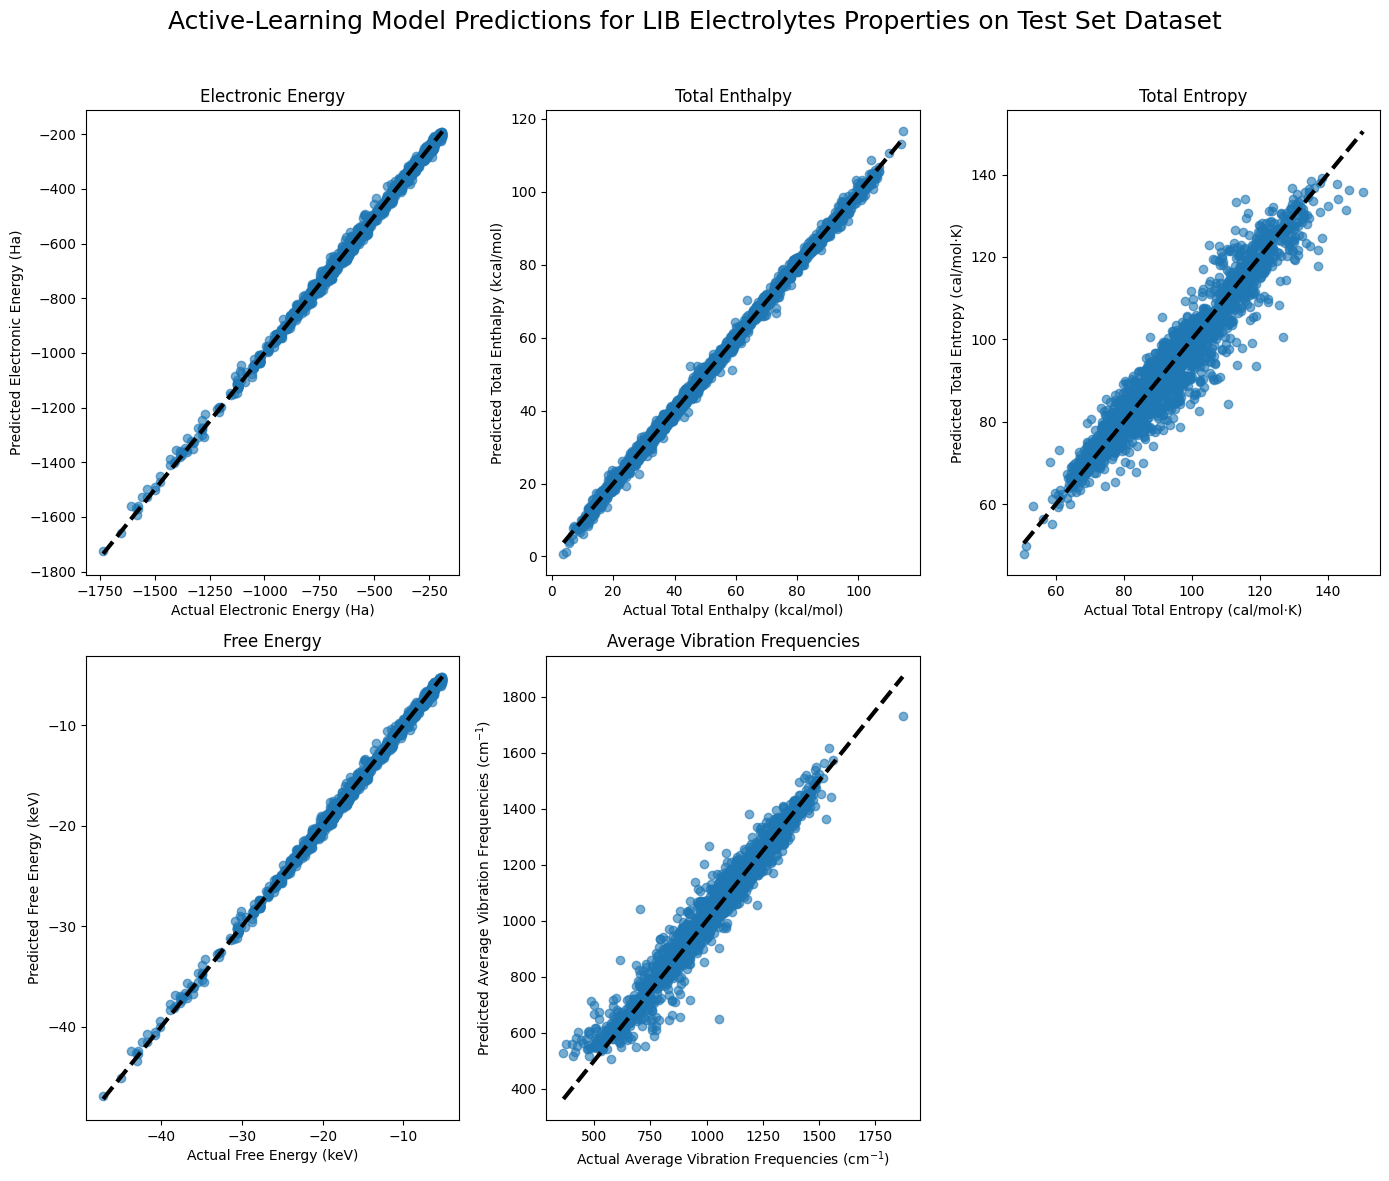

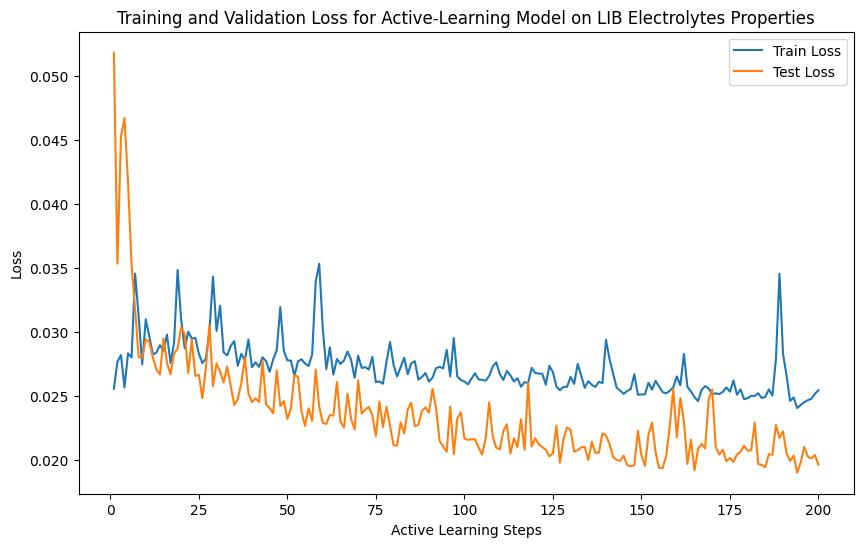

In [ ]:
plt.figure(figsize=(14, 12))

# Dictionary to provide axis labels with units
axis_labels_with_units = {
    'electronic_energy_Ha': 'Electronic Energy (Ha)',
    'total_enthalpy_kcal_mol': 'Total Enthalpy (kcal/mol)',
    'total_entropy_cal_molK': 'Total Entropy (cal/mol·K)',
    'free_energy_keV': 'Free Energy (keV)',
    'vibration_frequencies_avg': 'Average Vibration Frequencies (cm$^{-1}$)'
}

plot_titles_no_units = {
    'electronic_energy_Ha': 'Electronic Energy',
    'total_enthalpy_kcal_mol': 'Total Enthalpy',
    'total_entropy_cal_molK': 'Total Entropy',
    'free_energy_keV': 'Free Energy',
    'vibration_frequencies_avg': 'Average Vibration Frequencies'
}

for i, target_name in enumerate(target_columns):
    # Fix for free_energy_keV during plotting
    if target_name == 'free_energy_eV':
        target_name = 'free_energy_keV'

    plt.subplot(2, 3, i + 1)
    plt.scatter(actuals_original[:, i], predictions_original[:, i], alpha=0.6)
    plt.plot([actuals_original[:, i].min(), actuals_original[:, i].max()],
             [actuals_original[:, i].min(), actuals_original[:, i].max()], 'k--', lw=3)
    plt.xlabel(f'Actual {axis_labels_with_units[target_name]}')
    plt.ylabel(f'Predicted {axis_labels_with_units[target_name]}')
    plt.title(f'{plot_titles_no_units[target_name]}')

plt.suptitle('Active-Learning Model Predictions for LIB Electrolytes Properties on Test Set Dataset', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('/file/path/gnn_predictions_li_ion_battery_active_learning_200_new.png', dpi=300)
plt.show()

# Plot the learning curve (Train and Test Loss over active learning steps)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
plt.plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
plt.xlabel('Active Learning Steps')
plt.ylabel('Loss')
plt.title('Training and Validation Loss for Active-Learning Model on LIB Electrolytes Properties')
plt.legend()
plt.savefig('/file/path//learning_curve_li_ion_battery_active_learning_200_new.png', dpi=300)
plt.show()


In [ ]:
#Shap Analysis

In [ ]:
import torch
import shap
import numpy as np
import pickle
import matplotlib.pyplot as plt
from torch_geometric.data import Data, Batch
from sklearn.preprocessing import StandardScaler
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn.functional as F
import pandas as pd
from sklearn.model_selection import train_test_split
from pymatgen.core import Element
from pymatgen.analysis.graphs import MoleculeGraph

# Load the dataset and preprocess
df = pd.read_csv('/file/path/final_electronic_enthalpy_entropy_vibration_dataset.csv')
target_columns = ['electronic_energy_Ha', 'total_enthalpy_kcal_mol', 'total_entropy_cal_molK', 'free_energy_eV', 'vibration_frequencies_avg']
numeric_feature_columns = ['charge', 'number_atoms', 'number_elements', 'spin_multiplicity']

# Standardize the targets
y = df[target_columns].values
scaler_y = StandardScaler()
y_normalized = scaler_y.fit_transform(y)

# Parse molecule graphs into PyTorch Geometric Data
def parse_molecule_graph(molecule_graph_str):
    try:
        molecule_graph_dict = eval(molecule_graph_str)
        molecule_graph = MoleculeGraph.from_dict(molecule_graph_dict)
        return molecule_graph
    except Exception as e:
        print(f"Error parsing molecule graph: {molecule_graph_str}, Error: {e}")
        return None

def molgraph_to_pyg(row):
    atom_features = []
    bonds = eval(row['bonds'])
    for site in row['molecule_graph'].molecule:
        element = Element(site.specie.symbol)
        node_features = [element.Z]
        node_features.extend(row[numeric_feature_columns].values)  # Adding 4 additional features
        atom_features.append(node_features)

    edge_index = []
    for bond in bonds:
        edge_index.append([bond[0], bond[1]])
        edge_index.append([bond[1], bond[0]])

    edge_index = torch.tensor(edge_index, dtype=torch.long).t().contiguous()
    x = torch.tensor(atom_features, dtype=torch.float)
    return Data(x=x, edge_index=edge_index)

df['molecule_graph'] = df['molecule_graph'].apply(parse_molecule_graph)
df['pyg_graph'] = df.apply(lambda row: molgraph_to_pyg(row), axis=1)
df = df.dropna(subset=['pyg_graph'])

# Extract the PyG Data objects for training and testing
graph_data = df['pyg_graph'].tolist()
train_graphs, test_graphs, train_targets, test_targets = train_test_split(graph_data, y_normalized, test_size=0.2, random_state=42)

# Define the GNN model with 5 node features (atomic number + 4 additional features)
class GNNModel(torch.nn.Module):
    def __init__(self, hidden_channels, num_node_features):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.fc1 = torch.nn.Linear(hidden_channels, 64)
        self.fc2 = torch.nn.Linear(64, len(target_columns))

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = self.conv3(x, edge_index)
        x = global_mean_pool(x, batch)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the pretrained active learning model
model = GNNModel(hidden_channels=64, num_node_features=5)  # 5 features: atomic number + 4 additional features
model.load_state_dict(torch.load('/file/path/proj_1_Li_battery/gnn_model_after_active_learning_200.pth', map_location=torch.device('cpu')))
model.eval()  # Set the model to evaluation mode

# Custom SHAP wrapper for the active learning model
class ShapGNNWrapper:
    def __init__(self, model, num_node_features):
        self.model = model
        self.num_node_features = num_node_features

    def predict(self, data):
        data = torch.tensor(data, dtype=torch.float32)
        num_graph_features = self.num_node_features

        # Extract graph features from the flattened data
        graph_features = data[:, :num_graph_features]

        # Convert flattened graph features back to PyTorch Geometric Data format
        graph_data_list = []
        for i in range(graph_features.shape[0]):
            graph_feature = graph_features[i]
            num_nodes = len(graph_feature) // self.num_node_features
            node_features = graph_feature[:num_nodes * self.num_node_features].view(num_nodes, self.num_node_features)
            edge_index = torch.zeros((2, 0), dtype=torch.long)  # Dummy edge index since we don't have edge data here
            graph_data_list.append(Data(x=node_features, edge_index=edge_index))

        batch = Batch.from_data_list(graph_data_list)
        self.model.eval()
        with torch.no_grad():
            output = self.model(batch)
        return output.numpy()

# Sample a subset of test data for SHAP analysis
def sample_data(graphs, sample_size=100):
    indices = np.random.choice(len(graphs), sample_size, replace=False)
    sampled_graphs = [graphs[i] for i in indices]
    return sampled_graphs

# Sample the test data for SHAP analysis
sampled_test_graphs = sample_data(test_graphs, sample_size=100)

# Flatten the test data for SHAP
def flatten_data(graphs):
    max_num_nodes = max([graph.num_nodes for graph in graphs])
    flattened_graphs = []

    for graph in graphs:
        flattened_graph = torch.cat([graph.x.flatten(), torch.zeros(max_num_nodes * graph.x.size(1) - graph.num_nodes * graph.x.size(1))])
        flattened_graphs.append(flattened_graph)

    return torch.stack(flattened_graphs).numpy(), max_num_nodes

# Flatten the sampled test graphs for SHAP
flattened_data, max_num_nodes = flatten_data(sampled_test_graphs)

# Create the SHAP wrapper for the model
wrapper = ShapGNNWrapper(model, num_node_features=5)  # Ensure the wrapper knows the correct number of node features

# Create SHAP KernelExplainer and calculate SHAP values
explainer = shap.KernelExplainer(wrapper.predict, flattened_data[:10])
shap_values = explainer.shap_values(flattened_data)

# Convert SHAP values to percentages and verify they sum up to 100%
if isinstance(shap_values, list):
    for i, shap_value in enumerate(shap_values):
        total_shap_sum = np.abs(shap_value).sum(axis=1, keepdims=True)  # Sum SHAP values for each sample
        shap_percentages = (np.abs(shap_value) / total_shap_sum) * 100  # Convert to percentages
        print(f"SHAP values sum check for target {target_columns[i]}:")
        print(np.round(shap_percentages.sum(axis=1), 2))  # Should print an array of values close to 100%

        # Plot SHAP summary for each target output using percentage contributions
        print(f"Plotting SHAP summary for target: {target_columns[i]}")
        shap.summary_plot(shap_percentages, flattened_data, feature_names=np.array([f"Graph Feature {j}" for j in range(flattened_data.shape[1])]))
else:
    # Single output case
    total_shap_sum = np.abs(shap_values).sum(axis=1, keepdims=True)
    shap_percentages = (np.abs(shap_values) / total_shap_sum) * 100
    print("SHAP values sum check:")
    print(np.round(shap_percentages.sum(axis=1), 2))  # Should print an array of values close to 100%
    shap.summary_plot(shap_percentages, flattened_data, feature_names=np.array([f"Graph Feature {j}" for j in range(flattened_data.shape[1])]))

# Save the SHAP values for future use
with open('/file/path/proj_1_Li_battery/shap_values_active_learning.pkl', 'wb') as f:
    pickle.dump(shap_values, f)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Small epsilon to avoid division by zero
epsilon = 1e-8

# Mapping from dataset target names to display names
target_display_names = {
    "electronic_energy_Ha": "Electronic Energy",
    "total_enthalpy_kcal_mol": "Total Enthalpy",
    "total_entropy_cal_molK": "Total Entropy",
    "free_energy_eV": "Free Energy",
    "vibration_frequencies_avg": "Average Vibration Frequencies"
}

# Units for each target
target_units = {
    "Electronic Energy": "Ha",
    "Total Enthalpy": "kcal/mol",
    "Total Entropy": "cal/mol K",
    "Free Energy": "eV",
    "Average Vibration Frequencies": "cm⁻¹"
}

# Assuming shap_values and target_columns are already defined
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15), dpi=600)
axes = axes.flatten()  # Flatten the axes for easier indexing

# Define custom feature names with newlines for longer names
custom_feature_names = ["atomic\nnumber", "charge", "number of\natoms", "number of\nelements", "spin\nmultiplicity"]

for i, (shap_value, target_name) in enumerate(zip(shap_values, target_columns)):
    # Get the display name and unit for the target
    display_name = target_display_names.get(target_name, target_name)  # Fallback to the original name if no mapping found
    unit = target_units.get(display_name, "")  # Get the unit for the display name

    # Check if shap_value is 2D
    if shap_value.ndim == 2:
        # Calculate total SHAP value sum per sample
        total_shap_sum = np.abs(shap_value).sum(axis=1, keepdims=True) + epsilon  # Add epsilon to prevent division by zero

        # Calculate percentage contributions for each feature
        shap_percentages = (np.abs(shap_value) / total_shap_sum) * 100  # Convert to percentages

        # Calculate average feature contributions across samples
        feature_contributions = np.mean(shap_percentages, axis=0)  # Average over samples

        # Normalize feature contributions to sum to 100%
        feature_contributions = (feature_contributions / np.sum(feature_contributions)) * 100

    else:
        raise ValueError(f"Unexpected shape of shap_value: {shap_value.shape}. Only 2D arrays are supported in this case.")

    # Ensure correct length of feature_names
    num_features = len(feature_contributions)
    feature_names = custom_feature_names[:num_features]  # Adjust feature names to match

    # Create DataFrame for plotting
    shap_percent_df = pd.DataFrame({
        'Feature': feature_names,
        'SHAP Contribution (%)': feature_contributions
    })
    shap_percent_df = shap_percent_df.sort_values(by='SHAP Contribution (%)', ascending=False)

    # Plot using seaborn barplot if there is data to plot
    ax = axes[i]
    if shap_percent_df['SHAP Contribution (%)'].sum() > 0:
        sns.barplot(
            x='Feature',
            y='SHAP Contribution (%)',
            data=shap_percent_df,
            ax=ax,
            palette='coolwarm'
        )
        ax.set_xlabel('Features', fontsize=12, labelpad=10)
        ax.set_ylabel(f'%SHAP ({unit})', fontsize=12, labelpad=10)
        ax.set_title(display_name, fontsize=14, pad=15)
        ax.set_ylim(0, 100)  # Assuming values range up to 100%
        ax.yaxis.set_major_locator(plt.MultipleLocator(10))
    else:
        ax.set_visible(False)  # Hide empty plots if there is no data

# Remove any unused subplots (since we have only 5 targets)
for j in range(len(target_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to make sure everything fits nicely, without overlapping the title
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust rect to make space for suptitle
plt.suptitle('SHAP Feature Importance for Active-Learning Model on LIBE Dataset', fontsize=16)


# Save the figure
output_path = '/file/path/proj_1_Li_battery/feature_importance_plot.png'
plt.savefig(output_path, bbox_inches='tight')

# Show the plot
plt.show()


<ipython-input-10-7be88b0091a5>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-7be88b0091a5>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-7be88b0091a5>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-7be88b0091a5>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-10-7be88b0091a5>:70: FutureWarning: 

Passing `pa